In [1]:
%matplotlib inline
from vizwiz_api.vizwiz import VizWiz
from vizwiz_eval_cap.eval import VizWizEvalCap
import matplotlib.pyplot as plt
import skimage.io as io
import numpy as np
import pylab
#pylab.rcParams['figure.figsize'] = (8.0, 10.0)

import json
from json import encoder
encoder.FLOAT_REPR = lambda o: format(o, '.3f')

In [2]:
# download Stanford models
!bash get_stanford_models.sh # for Windows with Windows Subsystem for Linux (WSL) installed
#!./get_stanford_models.sh   # for Linux / MacOS

Found Stanford CoreNLP.


In [3]:
# file containing groundtruth
annFile = './annotations/VizWiz_Captions_v1_val.json'

# file containing generated results to be tested 
# only 500 images are selected for testing in this demo
resFile = './results/VizWiz_Fake_Captions.json'

In [4]:
# initialize VizWiz API for groundtruth 
vizwiz = VizWiz(annFile)

loading annotations into memory...
Done (t=0.04s)
creating index...
index created! imgs = 4271, anns = 21355


A television screen with directions on set up for the consumer.
Screen with something on it but not very visible.
A computer screen is on with an open text box
A monitor that is turned on with a dialogue box.
A television monitor displaying "snow" with an options screen enabled.


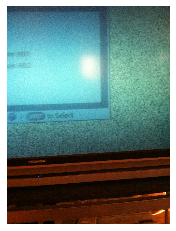

In [5]:
# get all images, select one at random
imgIds = vizwiz.getImgIds()
img = vizwiz.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]

# load and display caption annotations
annIds = vizwiz.getAnnIds(imgIds=img['id']);
anns = vizwiz.loadAnns(annIds)
vizwiz.showAnns(anns)

# load and display image
I = io.imread(img['vizwiz_url'])
plt.axis('off'); plt.imshow(I); plt.show()

In [6]:
# load generated results
vizwizRes = vizwiz.loadRes(resFile)

Loading and preparing results...
DONE (t=0.01s)
creating index...
index created! imgs = 100, anns = 100


In [7]:
# create cocoEval object by taking groundtruth and generated results
vizwizEval = VizWizEvalCap(vizwiz, vizwizRes)

In [8]:
# evaluate results
# SPICE will take a few minutes the first time, but speeds up due to caching
vizwizEval.evaluate()

tokenization...
setting up scorers...
computing Bleu score...
{'testlen': 896, 'reflen': 927, 'guess': [896, 796, 696, 596], 'correct': [505, 199, 59, 20]}
ratio: 0.9665587918004676
Bleu_1: 0.544
Bleu_2: 0.363
Bleu_3: 0.221
Bleu_4: 0.137
computing Rouge score...
ROUGE_L: 0.377
computing CIDEr score...
CIDEr: 0.255
computing SPICE score...
SPICE: 0.051


In [9]:
# print output evaluation scores
for metric, score in vizwizEval.eval.items():
    print('%s: %.3f'%(metric, score))

Bleu_1: 0.544
Bleu_2: 0.363
Bleu_3: 0.221
Bleu_4: 0.137
ROUGE_L: 0.377
CIDEr: 0.255
SPICE: 0.051


ground truth captions
Quality issues are too severe to recognize visual content.
A person has placed their open hand over a blue cloth.
A hand on top of a blue blanket outdoors.
A hand touching some blue fabric on a granite countertop.
A person's hand on a piece of blue fabric.


generated caption (CIDEr score 0.0)
A person ' s hand holding a blue phone.


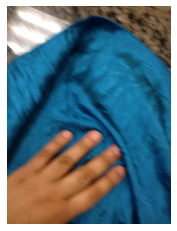

In [10]:
# demo how to use evalImgs to retrieve low score result
evals = [eva for eva in vizwizEval.evalImgs if eva['CIDEr']<30]
print('ground truth captions')
imgId = evals[np.random.randint(0,len(evals))]['image_id']
annIds = vizwiz.getAnnIds(imgIds=imgId)
anns = vizwiz.loadAnns(annIds)
vizwiz.showAnns(anns)

print('\n')
print('generated caption (CIDEr score %0.1f)'%(evals[0]['CIDEr']))
annIds = vizwizRes.getAnnIds(imgIds=imgId)
anns = vizwizRes.loadAnns(annIds)
vizwiz.showAnns(anns)

img = vizwiz.loadImgs(imgId)[0]
I = io.imread(img['vizwiz_url']) # use url to load image
plt.imshow(I)
plt.axis('off')
plt.show()

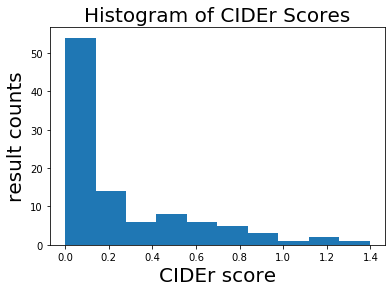

In [11]:
# plot score histogram
ciderScores = [eva['CIDEr'] for eva in vizwizEval.evalImgs]
plt.hist(ciderScores)
plt.title('Histogram of CIDEr Scores', fontsize=20)
plt.xlabel('CIDEr score', fontsize=20)
plt.ylabel('result counts', fontsize=20)
plt.show()

In [12]:
# save evaluation results to ./results folder
eval_imgs_file = './results/VizWiz_Fake_Captions_eval_imgs.json'
eval_file = './results/VizWiz_Fake_Captions_eval.json'

json.dump(vizwizEval.evalImgs, open(eval_imgs_file, 'w'), indent=2)
json.dump(vizwizEval.eval,     open(eval_file, 'w'), indent=2)